In [1]:
import json
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
data = {}
path = Path.cwd().parent / 'results' / 'periods'

date = '2024-03-22'
# for period in [30, 31, 32][:2]:
period = 24

with open(path / f'{date}_{period}.json') as f:
    r = json.load(f)


In [3]:
key = list(r)[0]
pprint(r[key]['nodal']['globals'])
pprint(r[key]['eso']['globals'])
pprint(r[key]['national']['globals'])

{'variables': {'balancing_cost': 0.0,
               'balancing_cost_savings': 548961.1819070121,
               'cfd_cost': 671246.2956870956,
               'cfd_cost_savings': -28283.82568709564,
               'congestion_rent': -96309.81013955874,
               'congestion_rent_savings': 96309.81014008832,
               'wholesale_cost': 940967.7098431173,
               'wholesale_cost_savings': -58899.146306590876}}
{'variables': {'balancing_cost': 176381.68046633012,
               'balancing_cost_savings': 372579.501440682,
               'cfd_cost': 618762.303129896,
               'cfd_cost_savings': 24200.166870103916,
               'congestion_rent': -96443.55594911426,
               'congestion_rent_savings': 96443.55594964384,
               'wholesale_cost': 932877.2513018982,
               'wholesale_cost_savings': -50808.68776537175}}
{'variables': {'balancing_cost': 548961.1819070121,
               'balancing_cost_savings': 0.0,
               'cfd_cost': 64296

                             national           eso         nodal
wholesale_cost           8.820686e+05  9.328773e+05  9.409677e+05
balancing_cost           5.489612e+05  1.763817e+05  0.000000e+00
congestion_rent          5.295733e-07 -9.644356e+04 -9.630981e+04
cfd_cost                 6.429625e+05  6.187623e+05  6.712463e+05
wholesale_cost_savings   0.000000e+00 -5.080869e+04 -5.889915e+04
balancing_cost_savings   0.000000e+00  3.725795e+05  5.489612e+05
congestion_rent_savings  0.000000e+00  9.644356e+04  9.630981e+04
cfd_cost_savings         0.000000e+00  2.420017e+04 -2.828383e+04
total                    2.073992e+06  1.631578e+06  1.515904e+06
total_savings            0.000000e+00  4.424145e+05  5.580880e+05


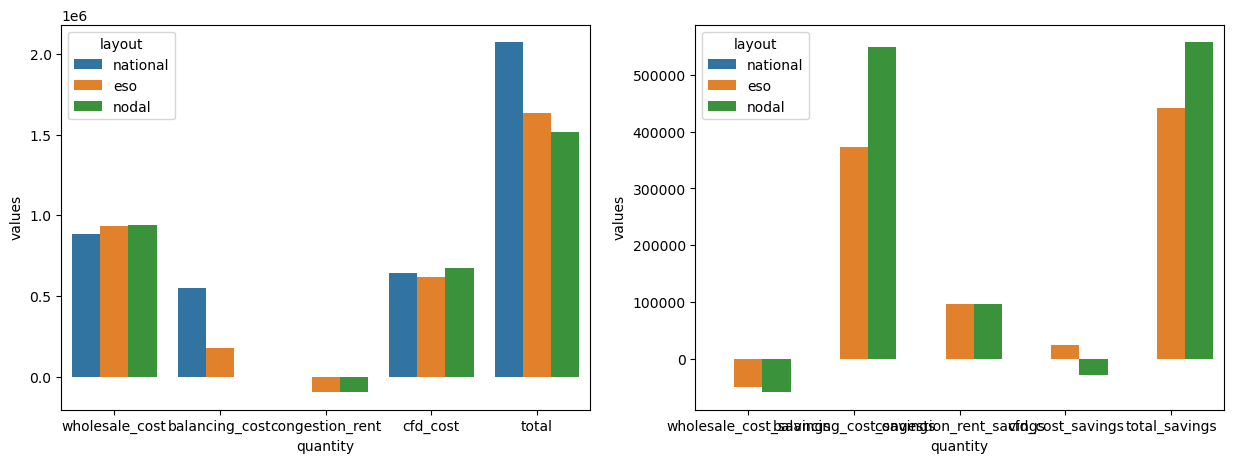

In [4]:
ls = ['national', 'eso', 'nodal']
df = pd.concat([pd.Series(r[key][l]['globals']['variables']).rename(l) for l in ls], axis=1)

df.loc['total'] = df.loc[~df.index.str.contains('savings')].sum()
df.loc['total_savings'] = df.loc[df.index.str.contains('savings')].sum()


print(df)


df = pd.concat((
    pd.DataFrame({
        "values": df[l].values,
        "layout": [l for _ in range(len(df[l]))],
        "quantity": df[l].index.values
    }) for l in ls), axis=0
)


import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ss1 = df.loc[df['quantity'].str.contains('savings')]
ss2 = df.loc[~df['quantity'].str.contains('savings')]

sns.barplot(x='quantity', y='values', hue='layout', data=ss1, ax=axs[1])
sns.barplot(x='quantity', y='values', hue='layout', data=ss2, ax=axs[0])


plt.show()

In [6]:
import sys
sys.path.append(str(Path.cwd().parent / 'scripts'))

from _aggregation_helpers import flexible_aggregate

date = '2024-03-22'
results = {}

for period in [20, 21, 22]:

    with open(path / f'{date}_{period}.json') as f:
        r = json.load(f)

    results.update(r)

total = {
    list(results)[0]: flexible_aggregate(results)
}



In [12]:
l = 'eso'
q = 'geographies'

print(results[list(results)[0]][l][q])
print(results[list(results)[1]][l][q])
print(results[list(results)[2]][l][q])

{'GB0 Z7': {'variables': {'wholesale_price': 31.70597267150879, 'load': 1807.4486083984375, 'post_policy_price': 55.93083953857422, 'single-rate-domestic_wholesale_savings': -0.0005485442816279829, 'single-rate-domestic_total_savings': 0.008607967756688595, 'multi-rate-domestic_wholesale_savings': -0.000535437895450741, 'multi-rate-domestic_total_savings': 0.008402296341955662, 'single-rate-nondomestic_wholesale_savings': -0.0037797056138515472, 'single-rate-nondomestic_total_savings': 0.05931258946657181, 'multi-rate-nondomestic_wholesale_savings': -0.004480866249650717, 'multi-rate-nondomestic_total_savings': 0.07031547278165817}}, 'GB0 Z6': {'variables': {'wholesale_price': 31.70597267150879, 'load': 174.79212951660156, 'post_policy_price': 55.93083953857422, 'single-rate-domestic_wholesale_savings': -0.0005485442816279829, 'single-rate-domestic_total_savings': 0.008607967756688595, 'multi-rate-domestic_wholesale_savings': -0.000535437895450741, 'multi-rate-domestic_total_savings': 

In [14]:
# total[list(total)[0]][l][q]

In [28]:
import os
import json

with open(Path.cwd().parent / 'live' / 'monthly_raw.json') as f:
    raw = json.load(f)

month_start = pd.Timestamp('2024-03-01')

with open(Path.cwd().parent / 'results' / 'periods' / '2024-03-22_22.json') as f:
    results = json.load(f)

results[str(int(month_start.timestamp()))] = results.pop(list(results)[0])

In [29]:
list(results[list(results)[0]])

['national', 'nodal', 'eso']

In [32]:
with open(Path.cwd().parent / 'live' / 'monthly_raw.json', 'w') as f:
    json.dump(results, f, indent=4)

In [31]:
results

{'1709251200': {'national': {'geographies': {'GB': {'variables': {'wholesale_price': 40.62871551513672,
      'load': 28602.34375,
      'post_policy_price': 79.68667602539062,
      'single-rate-domestic_wholesale_savings': 0.0,
      'single-rate-domestic_total_savings': 0.0,
      'multi-rate-domestic_wholesale_savings': 0.0,
      'multi-rate-domestic_total_savings': 0.0,
      'single-rate-nondomestic_wholesale_savings': 0.0,
      'single-rate-nondomestic_total_savings': 0.0,
      'multi-rate-nondomestic_wholesale_savings': 0.0,
      'multi-rate-nondomestic_total_savings': 0.0}}},
   'globals': {'variables': {'wholesale_cost': 1162076.558653703,
     'balancing_cost': 519882.10974947934,
     'congestion_rent': -4.563480615615845e-08,
     'cfd_cost': 597267.1181435871,
     'wholesale_cost_savings': 0.0,
     'balancing_cost_savings': 0.0,
     'congestion_rent_savings': 0.0,
     'cfd_cost_savings': 0.0}}},
  'nodal': {'geographies': {'4950': {'variables': {'wholesale_price':